Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport sherlock
from sherlock import Sherlock
from sherlock.RBF import bases
from sherlock.utils import adrs, read_design_space, approximate_pareto
import dcor
import random

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
random.seed(0)
np.random.seed(0)

X, y, _, names, _ = read_design_space('./example_data/slambench_orbslam2.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

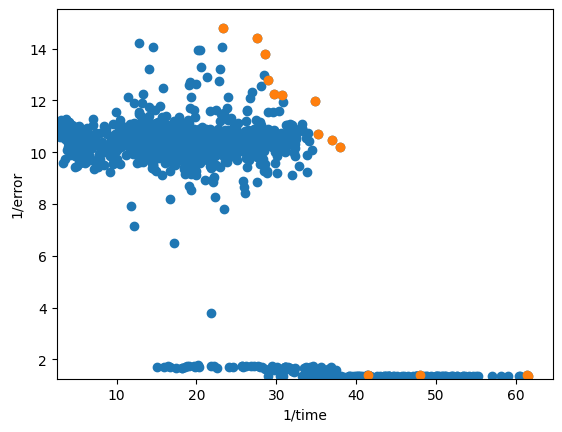

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0018811375170122474


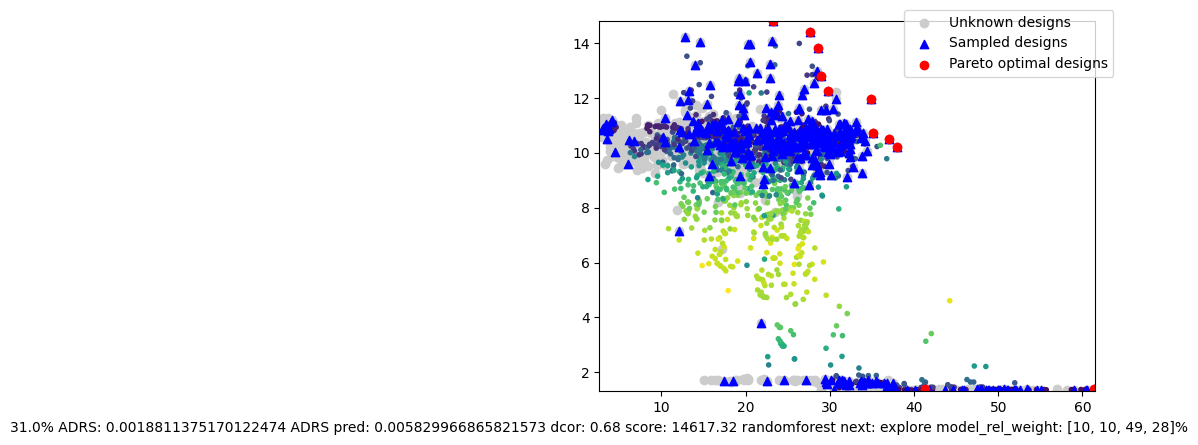

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
import sys

np.savetxt(f"known_value_{sys.version}.txt", sherlock.known_idx)
sherlock.known_idx

array([   0,  408,  816,    2,  410,   48,  413,  422,  446, 1210,  470,
        518,  420,  419,  515,  803,  638,  467,  563,  587,  683,  707,
        566,  827,  635,  659,  626,  632,  647,  695,  641,  527,  674,
        689,  680,  704,  671,  698,  578,  554,  431,  719,  644,  983,
        717,  119,  593,  512,   69,  702,  311,  584,  711,  718,  416,
        713,  479,  694,  477,  458,  506,  581,  701,  590,  521,  596,
        569,  473,  716,  429,  478,  693,  464,  557,   56,  404,  463,
        425, 1126,  656,  454,  710, 1103,  990,  430,  839, 1214,   71,
        462,   23, 1127, 1195,  646,  287,  582,  631,  703,  239,  407,
        886,  295,  310,  175,  559,  574,  526,  443,  670,  755,  746,
        761,  758,  756,  749,  347,  753,  779,  449,  782,  350,  491,
        338,  764, 1125,  309,  356,  583, 1172,  788,  353,  380,  354,
        785,  374,  341,  812,  434,  650,  530,  722,  415,  744,  759,
        745,  773,  887,  770,  455,  768,  511,  6